<a href="https://colab.research.google.com/github/Sabrinapearlpervez/food-sales-predictions/blob/main/food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [346]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
from sklearn.pipeline import make_pipeline
reg_pipe = make_pipeline(scaler, reg)
from sklearn.tree import DecisionTreeRegressor

In [347]:
sales_predictions = '/content/sales_predictions (2).csv'

In [348]:
df = pd.read_csv(sales_predictions)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [349]:
df.shape
#number of rows and columns

(8523, 12)

In [350]:
df.dtypes
#datatypes of each variable

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [351]:
df.duplicated()
#checking for duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [352]:
df= df.drop_duplicates()
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [353]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [354]:
df.isna().sum()
#Identified the missing values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [355]:
df = df.drop(columns=['Item_Weight', 'Outlet_Size'], axis=0)
df
#Dropped both Item Weight and the Outlet Size columns, too many missing values.

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Tier 3,Supermarket Type2,1845.5976


In [356]:
df.isna().sum()
#making sure there are no more missing values

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [357]:
df['Item_Visibility'].min()

0.0

In [358]:
df['Item_Visibility'].max()

0.328390948

In [359]:
df['Item_Visibility'].mean()
#all the codes above are the min,max, mean for Item Visibility

0.06613202877895127

In [360]:
df['Item_MRP'].min()

31.29

In [361]:
df['Item_MRP'].max()

266.8884

In [362]:
df['Item_MRP'].mean()
#all the codes above are the min,max, mean for Item MRP

140.9927819781768

In [363]:
df['Outlet_Establishment_Year'].min()

1985

In [364]:
df['Outlet_Establishment_Year'].max()

2009

In [365]:
df['Outlet_Establishment_Year'].mean()
#all the codes above are the min,max, mean for Outlet Establishment Year

1997.8318667135984

In [366]:
df['Item_Outlet_Sales'].min()

33.29

In [367]:
df['Item_Outlet_Sales'].max()

13086.9648

In [368]:
df['Item_Outlet_Sales'].mean()
#all the codes above are the min,max, mean for Item Outlet Sales

2181.2889135750365

In [369]:
import matplotlib.pyplot as plt
import seaborn as sns

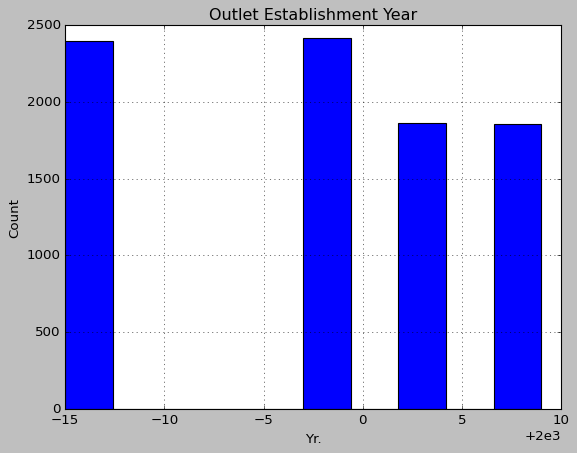

In [370]:
df['Outlet_Establishment_Year'].hist();
plt.title('Outlet Establishment Year');
plt.xlabel('Yr.');
plt.ylabel('Count');
#histogram of Outlet Establishment Year

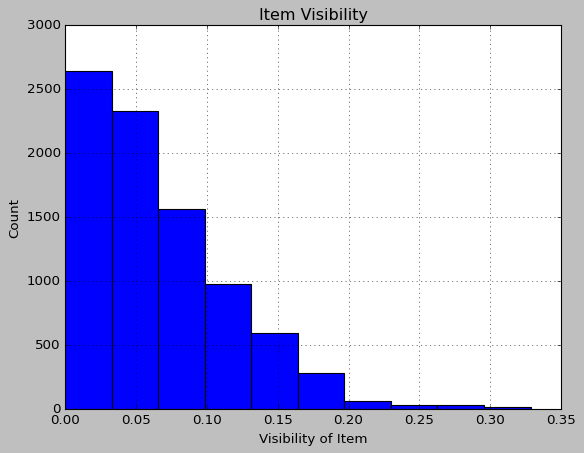

In [371]:
df['Item_Visibility'].hist();
plt.title('Item Visibility');
plt.xlabel('Visibility of Item');
plt.ylabel('Count');
#histogram of Item Visibility

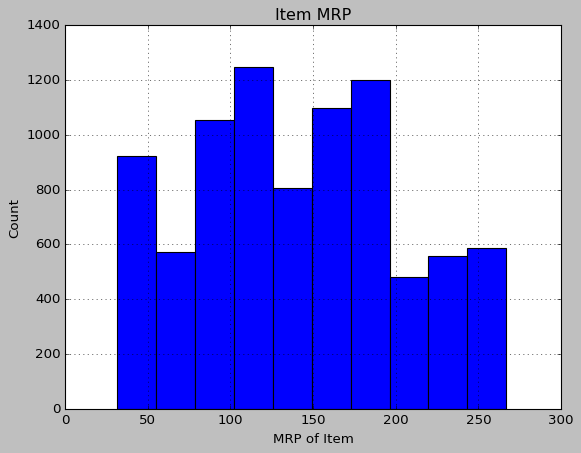

In [372]:
df['Item_MRP'].hist();
plt.title('Item MRP');
plt.xlabel('MRP of Item');
plt.ylabel('Count');
#histogram of Item MRP

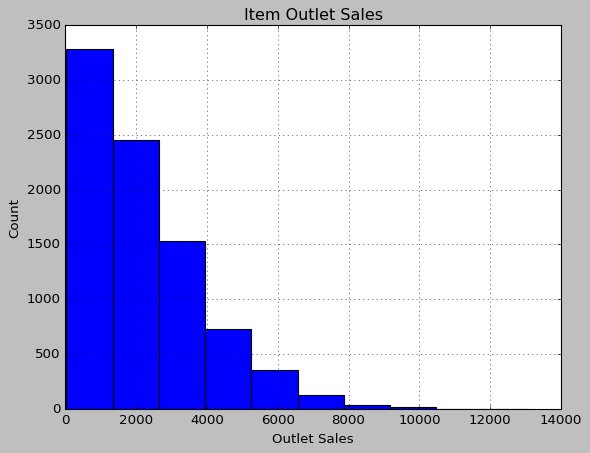

In [373]:
df['Item_Outlet_Sales'].hist();
plt.title('Item Outlet Sales');
plt.xlabel('Outlet Sales');
plt.ylabel('Count');
#histogram of Item Outlet Sales

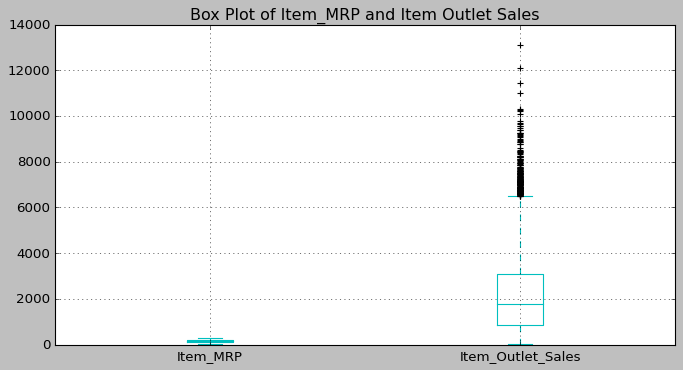

In [374]:
from IPython.core.pylabtools import figsize

plt.figure(figsize=(10,5));
df.boxplot(['Item_MRP', 'Item_Outlet_Sales'],
           color = 'c');
plt.title('Box Plot of Item_MRP and Item Outlet Sales')
patch_artist=True
#Boxplot of Item MRP and Item Outlet Sales

In [375]:
corr = df.corr()
corr

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,-0.128625,0.567574,-0.049135,1.000000


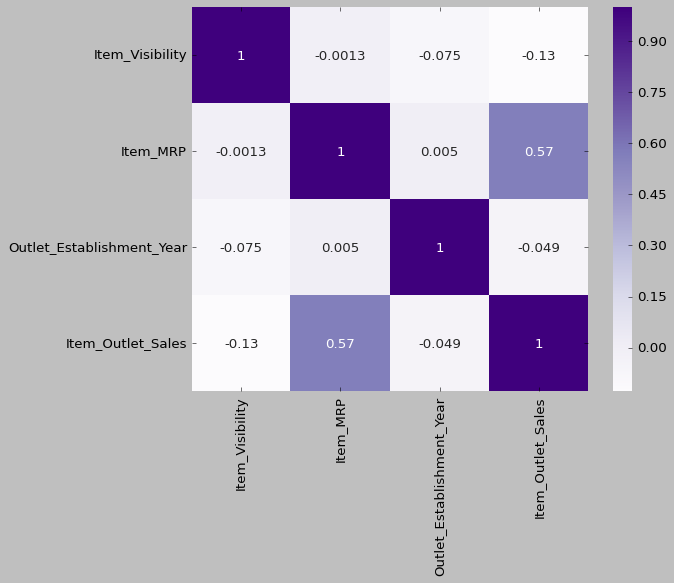

In [376]:
sns.heatmap(corr, cmap = 'Purples', annot =True);
#Correlation Heatmap 

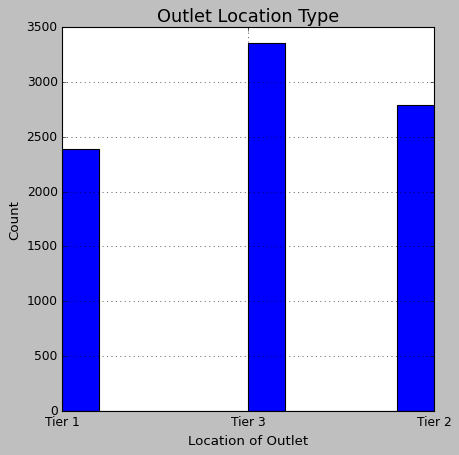

In [377]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(6)
df['Outlet_Location_Type'].hist();
plt.style.use('Solarize_Light2')
plt.xlabel('Location of Outlet', c='black', fontsize=12);
plt.ylabel('Count', c='black', fontsize=12);
plt.xticks(fontsize=11, c='black');
plt.yticks(fontsize=11, c='black');
plt.title('Outlet Location Type');
#histogram of Oulet Location Type

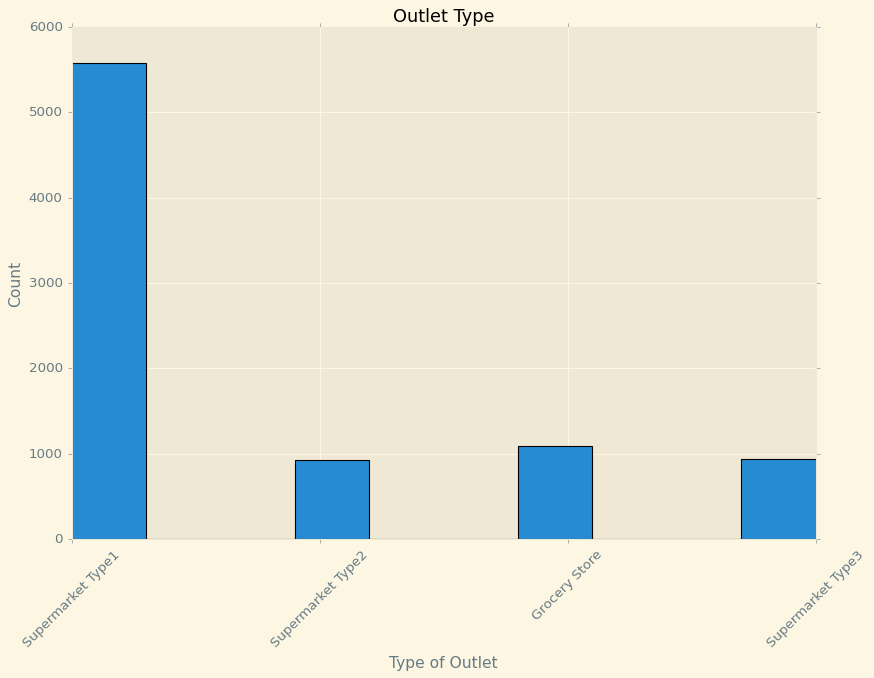

In [378]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(12)
plt.xticks(rotation = 45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Type of Outlet', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Outlet Type')
plt.style.use('grayscale')
df['Outlet_Type'].hist();
#histogram of Outlet Type

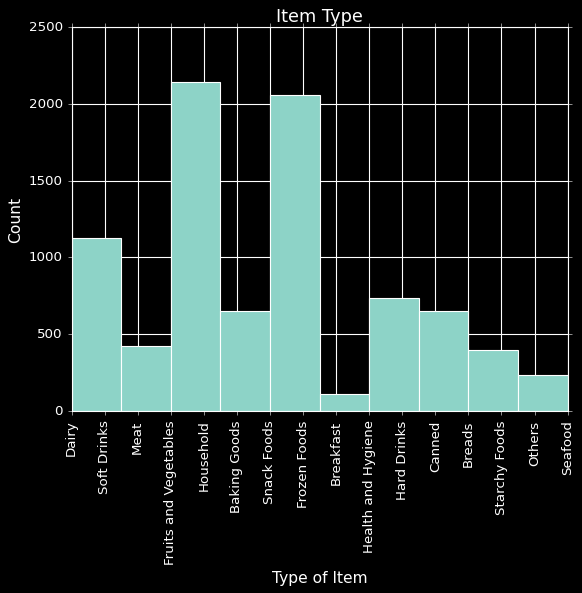

In [379]:
plt.style.use('dark_background')
df['Item_Type'].hist();

plt.xticks(rotation = 90);
plt.xlabel('Type of Item', fontsize=14);
plt.ylabel('Count', fontsize=14);
plt.xticks(fontsize=12);
plt.title('Item Type');
#histogram of Item Type

In [380]:
df = pd.read_csv(sales_predictions)
#Original dataframe

In [381]:
df.isna().sum()
#total missing values in our dataframe

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [382]:
target = 'Item_Outlet_Sales'
X = df.drop(columns=target, axis=1)
y = df[target]
#the features (X) and target (y)

In [383]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#train test split 

In [384]:
display(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6392 non-null   object 
 1   Item_Weight                5285 non-null   float64
 2   Item_Fat_Content           6392 non-null   object 
 3   Item_Visibility            6392 non-null   float64
 4   Item_Type                  6392 non-null   object 
 5   Item_MRP                   6392 non-null   float64
 6   Outlet_Identifier          6392 non-null   object 
 7   Outlet_Establishment_Year  6392 non-null   int64  
 8   Outlet_Size                4580 non-null   object 
 9   Outlet_Location_Type       6392 non-null   object 
 10  Outlet_Type                6392 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 599.2+ KB


None

In [385]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [386]:
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

In [387]:
scaler = StandardScaler()
ohe__encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [388]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe
#numeric pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [389]:
categorical_pipe = make_pipeline(freq_imputer, ohe__encoder)
categorical_pipe
#categorical pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [390]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

In [391]:
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor
#preprocessing steps

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3225fa1a90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3225fa1c10>)])

In [392]:
preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [393]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 1595)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

In [394]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [395]:
df['Item_Fat_Content'].replace({'Low Fat':0, 'Regular':1, 'low fat':0, 'LF':0, 'reg':1 }, inplace=True)
df['Item_Fat_Content'].value_counts()
#replacing values for ohe

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [396]:
cat_selector = make_column_selector(dtype_include='object')

In [345]:
df.drop(columns=['Item_Identifier'], inplace=True)

In [397]:
cat_selector(X_train)
#categorical data selector

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [398]:
train_cat_data = X_train[cat_selector(X_train)]
test_cat_data = X_test[cat_selector(X_test)]
train_cat_data
#categorical training data

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,NCG06,Low Fat,Household,OUT018,Medium,Tier 3,Supermarket Type2
7510,FDV57,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2
5828,FDM27,Regular,Meat,OUT049,Medium,Tier 1,Supermarket Type1
5327,FDG24,Low Fat,Baking Goods,OUT035,Small,Tier 2,Supermarket Type1
4810,FDD05,Low Fat,Frozen Foods,OUT045,NaN,Tier 2,Supermarket Type1
...,...,...,...,...,...,...,...
5734,FDY08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
5191,FDC41,Low Fat,Frozen Foods,OUT017,NaN,Tier 2,Supermarket Type1
5390,NCQ53,Low Fat,Health and Hygiene,OUT045,NaN,Tier 2,Supermarket Type1
860,FDL46,low fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1


In [399]:
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe_encoder.fit(train_cat_data)
train_ohe = ohe_encoder.transform(train_cat_data)
test_ohe = ohe_encoder.transform(test_cat_data)
train_ohe
#OneHotEncoder pre steps on training data

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [400]:
ohe_column_names = ohe_encoder.get_feature_names(train_cat_data.columns)
train_ohe = pd.DataFrame(train_ohe, columns=ohe_column_names)
test_ohe = pd.DataFrame(test_ohe, columns=ohe_column_names)
train_ohe
#OneHotEncoded Item Identifier column

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [401]:
y = df['Item_Outlet_Sales']
X = df.drop(columns = 'Item_Outlet_Sales')
#the target (y) and features (X)

In [402]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
#train test split the data

In [403]:
reg_pipe = make_pipeline(preprocessor, reg)
#preprocessor

In [404]:
reg_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3225fa1a90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3225fa1c10>)])),
                ('linearregression', LinearRegression())])

In [405]:
predictions = reg_pipe.predict(X_test)
#predictions on the test model

In [406]:
prediction_cf = X_test.copy()
prediction_cf['True Median Price'] = y_test
prediction_cf['Predicted Median Price'] = predictions
prediction_cf['Error'] = predictions - y_test
prediction_cf.head()
#predictions compared to our normal dataframe

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,True Median Price,Predicted Median Price,Error
7503,FDI28,14.300,0,0.026300,Frozen Foods,79.4302,OUT013,1987,High,Tier 3,Supermarket Type1,1743.0644,880.0,-863.0644
2957,NCM17,7.930,0,0.071136,Health and Hygiene,42.7086,OUT046,1997,Small,Tier 1,Supermarket Type1,356.8688,1052.0,695.1312
7031,FDC14,14.500,1,0.041313,Canned,42.0454,OUT049,1999,Medium,Tier 1,Supermarket Type1,377.5086,1316.0,938.4914
1084,DRC36,NaN,1,0.044767,Soft Drinks,173.7054,OUT027,1985,Medium,Tier 3,Supermarket Type3,5778.4782,3732.0,-2046.4782
856,FDS27,10.195,1,0.012456,Meat,197.5110,OUT035,2004,Small,Tier 2,Supermarket Type1,2356.9320,1820.0,-536.9320


In [407]:
train_pred = reg_pipe.predict(X_train)
test_pred = reg_pipe.predict(X_test)
print(train_pred)
print(test_pred)

[3004. 3796. 2240. ... 4724.  780. 1448.]
[ 880. 1052. 1316. ... 4348. 2000. 2380.]


In [422]:
train_score = reg_pipe.score(X_train, y_train)
test_score = reg_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

0.6713861193649415
-8.41647918034425e+19


In [423]:
train_MAE = np.mean(np.abs(train_pred - y_train))
test_MAE = np.mean(np.abs(test_pred - y_test))

print(f'Model Training MAE:{train_MAE}')
print(f'Model Testing MAE:{test_MAE}')
#MAE on the training and testing data on the linear reg model

Model Training MAE:736.2879377346692
Model Testing MAE:905870035782.005


In [410]:
train_MSE = np.mean(np.abs(train_pred - y_train)**2)
test_MSE = np.mean(np.abs(test_pred - y_test)**2)

print(f'Model Training MSE:{train_MSE}')
print(f'Model Training MSE:{test_MSE}')
#MSE on the training and testing data on the linear reg model

Model Training MSE:972518.2236320331
Model Training MSE:2.3220874901867352e+26


In [411]:
train_r2 = np.corrcoef(y_train, train_pred)[0][1]**2
test_r2 = np.corrcoef(y_test, test_pred)[0][1]**1

print(f'Model Training R2:{train_r2}')
print(f'Model Testing R2:{test_r2}')
#R2 of both the training model and testing model

Model Training R2:0.67138705375965
Model Testing R2:0.017597914757248718


In [412]:
train_RMSE = np.sqrt(np.mean(np.abs(train_pred-y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(test_pred-y_test)**2))

print(f'Model Training RMSE:{train_RMSE}')
print(f'Model Testing RMSE:{test_RMSE}')
#RMSE of both the training model and testing model

Model Training RMSE:986.1633858707355
Model Testing RMSE:15238397193231.102


The linear regression model will do poorly. The R2 has high bias and variance. The RMSE on the training model and testing model is not too far apart, the testing model is higher than the training model, it is fairly high, the data is less reliable.

In [413]:
dec_tree = DecisionTreeRegressor(max_depth=None)
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
dec_tree_pipe.fit(X_train, y_train)
#preprocessor

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3225fa1a90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3225fa1c10>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [424]:
train_preds = dec_tree_pipe.predict(X_train)
test_preds = dec_tree_pipe.predict(X_test)
print(train_preds)
print(test_preds)

[ 515.3292 3056.022  1577.946  ... 6145.334  1649.8524  965.41  ]
[ 792.302  1249.0408 1198.44   ... 6371.706   468.7232 1336.2606]


In [415]:
training_score = dec_tree_pipe.score(X_train, y_train)
testing_score = dec_tree_pipe.score(X_test, y_test)
print(training_score)
print(testing_score)

1.0
0.20446617966139236


In [416]:
dec_tree.get_depth()

60

In [417]:
dec_tree.get_n_leaves()

6255

In [418]:
training_MAE = np.mean(np.abs(train_pred - y_train))
testing_MAE = np.mean(np.abs(test_pred - y_test))

print(f'Model Training MAE:{training_MAE}')
print(f'Model Testing MAE:{testing_MAE}')
#MAE on the training and testing data on the decision tree model

Model Training MAE:736.2879377346692
Model Testing MAE:905870035782.005


In [419]:
training_MSE = np.mean(np.abs(train_pred - y_train)**2)
testing_MSE = np.mean(np.abs(test_pred - y_test)**2)

print(f'Model Training MSE:{training_MSE}')
print(f'Model Testing MSE:{testing_MSE}')
#MSE on the training and testing data on the decision tree model

Model Training MSE:972518.2236320331
Model Testing MSE:2.3220874901867352e+26


In [420]:
training_r2 = np.corrcoef(y_train, train_preds)[0][1]**2
testing_r2 = np.corrcoef(y_test, test_preds)[0][1]**1

print(f'Model Training R2:{training_r2}')
print(f'Model Testing R2:{testing_r2}')
#R2 on the training and testing data on the decision tree model

Model Training R2:0.9999999999999998
Model Testing R2:0.6163302822636485


In [421]:
training_RMSE = np.sqrt(np.mean(np.abs(train_preds-y_train)**2))
testing_RMSE = np.sqrt(np.mean(np.abs(test_preds-y_test)**2))

print(f'Model Training RMSE:{training_RMSE}')
print(f'Model Testing RMSE:{testing_RMSE}')
#RMSE on the training and testing data on the decision tree model

Model Training RMSE:4.925864104892086e-15
Model Testing RMSE:1481.5059034631881


In [342]:
max_depth_range = list(range(2, 61))
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, random_state = 42)
    dec_tree_pipe.fit(X_train, y_train)
    score = dec_tree_pipe.score(X_test, y_test)
    r2.append(score)
    

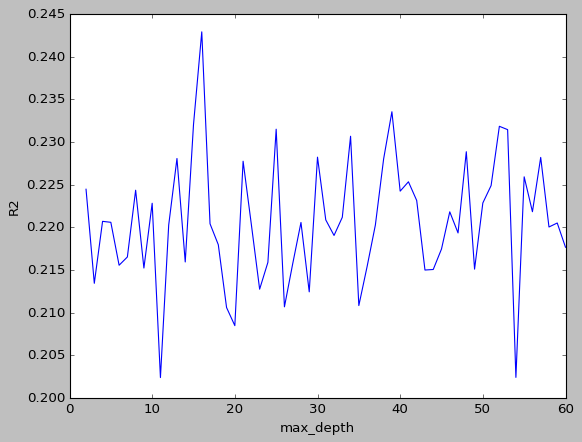

In [343]:
plt.style.use('classic')
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');
#graph of the R2 in our decision tree model

In [344]:
dec_tree_model = DecisionTreeRegressor(max_depth = 35, random_state = 42)
dec_tree_model_pipe = make_pipeline(preprocessor, dec_tree_model)
dec_tree_model_pipe.fit(X_train, y_train)
train_9_score = dec_tree_model_pipe.score(X_train, y_train)
test_9_score = dec_tree_model_pipe.score(X_test, y_test)
print(train_9_score)
print(test_9_score)
#It seems to be doing great on the training set but poorly on the test set

0.9696488787309145
0.2425874368004367


The decision tree model will do better to some extend. It still may have some errors due to the high variance on the R2 training score, it is overfit. The RMSE on the training model is low, which means the training model would do better than the testing model.

In this case, I think the better option would be to go with the decision tree model. The MAE on both is the same, they would have the same number of errors. On the linear regression model the R2 has high bias and variance, a model with high bias is consistently unable to make good predictions using any set of features. The R2 on the decision tree model only has high variance, although they both would cause errors, the right way to go would be the decision tree model.